<a href="https://colab.research.google.com/github/Evap1/Into-to-ML/blob/main/MajorHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
dataset = pd.read_csv('virus_data.csv')

In [ ]:
dataset.shape

(1250, 25)

In [ ]:
from matplotlib import pylab
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
}
pylab.rcParams.update(params)

In [ ]:
dataset.head()

patient_id  age sex  weight blood_type          current_location  \
0         733   31   F    80.8         O-  ('11.93381', '79.82979')   
1         382   29   F    63.0         O+   ('51.67822', '33.9162')   
2        1164   44   F    74.2         O+  ('60.02427', '30.28491')   
3         897    9   M    31.8         O-   ('51.08468', '7.11393')   
4        1187   18   F    42.4         A-  ('38.45598', '48.87498')   

   num_of_siblings  happiness_score  household_income  conversations_per_day  \
0                6                6               0.7                      5   
1                1                9               NaN                     11   
2                2               10               1.5                      3   
3                3                9               0.5                      8   
4                0                8               0.2                      4   

   ...      PCR_03      PCR_04    PCR_05     PCR_06    PCR_07     PCR_08  \
0  ... -154.375498  176.847024  4.385181  10.213329  0.927466  22.333871   
1  ... -200.700948   -7.135415  7.128887  30.027329 -0.084755   1.700489   
2  ...  127.222441   59.712513  1.227654  16.907687  1.609130   7.258721   
3  ...  116.178667   72.100204  6.181840  17.018475  2.313162   1.707770   
4  ...   71.377753  187.436001  4.709932  13.888960  5.401181   4.500906   

     PCR_09      PCR_10  spread  risk  
0  2.392578 -126.780598     1.0     1  
1  2.735347 -175.576828    -1.0    -1  
2  4.937827 -233.105192    -1.0    -1  
3  1.686465  -28.548362    -1.0    -1  
4  3.767817  -27.173870    -1.0    -1  

[5 rows x 25 columns]

In [ ]:
dataset['conversations_per_day'].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [ ]:
# part 1 Q4 - splitting the date set to train (80%) and test (20%) parts , two last digits: 49 + 97 = 146
from sklearn.model_selection import train_test_split
y = dataset[['spread', 'risk']];
X_dataset = dataset.drop(['spread', 'risk'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y, test_size=0.2, random_state=146)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 23), (250, 23), (1000, 2), (250, 2))

In [ ]:
X_train.isnull().any()

patient_id               False
age                      False
sex                      False
weight                   False
blood_type               False
current_location         False
num_of_siblings          False
happiness_score          False
household_income          True
conversations_per_day    False
sugar_levels             False
sport_activity           False
pcr_date                 False
PCR_01                   False
PCR_02                   False
PCR_03                   False
PCR_04                   False
PCR_05                   False
PCR_06                   False
PCR_07                   False
PCR_08                   False
PCR_09                   False
PCR_10                   False
dtype: bool

In [ ]:
X_test.isnull().any()

patient_id               False
age                      False
sex                      False
weight                   False
blood_type               False
current_location         False
num_of_siblings          False
happiness_score          False
household_income          True
conversations_per_day    False
sugar_levels             False
sport_activity           False
pcr_date                 False
PCR_01                   False
PCR_02                   False
PCR_03                   False
PCR_04                   False
PCR_05                   False
PCR_06                   False
PCR_07                   False
PCR_08                   False
PCR_09                   False
PCR_10                   False
dtype: bool

In [ ]:
X_train.household_income.isnull().sum()

77

In [ ]:
X_test.household_income.isnull().sum()

32

<Axes: xlabel='household_income', ylabel='Count'>

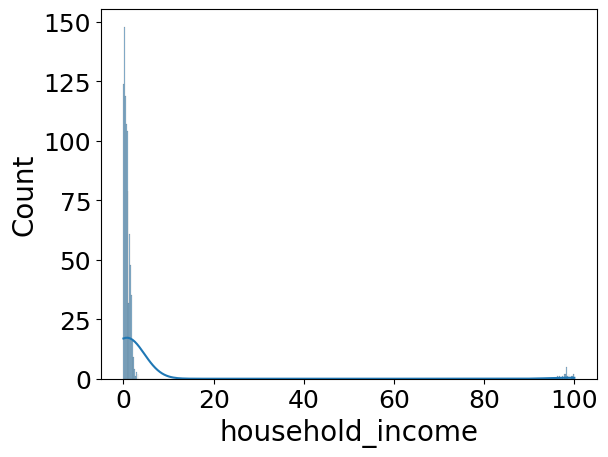

In [ ]:
# Q6 create histogram for missing fields.
sns.histplot(X_train.household_income, kde=True)

In [ ]:
X_train.household_income.describe()

count    923.000000
mean       3.099133
std       14.910795
min        0.000000
25%        0.300000
50%        0.700000
75%        1.200000
max      100.000000
Name: household_income, dtype: float64

In [ ]:
#Q7 fillna with median, both train and set
X_train.household_income = X_train.household_income.fillna(X_train.household_income.median())
X_test.household_income = X_test.household_income.fillna(X_test.household_income.median())

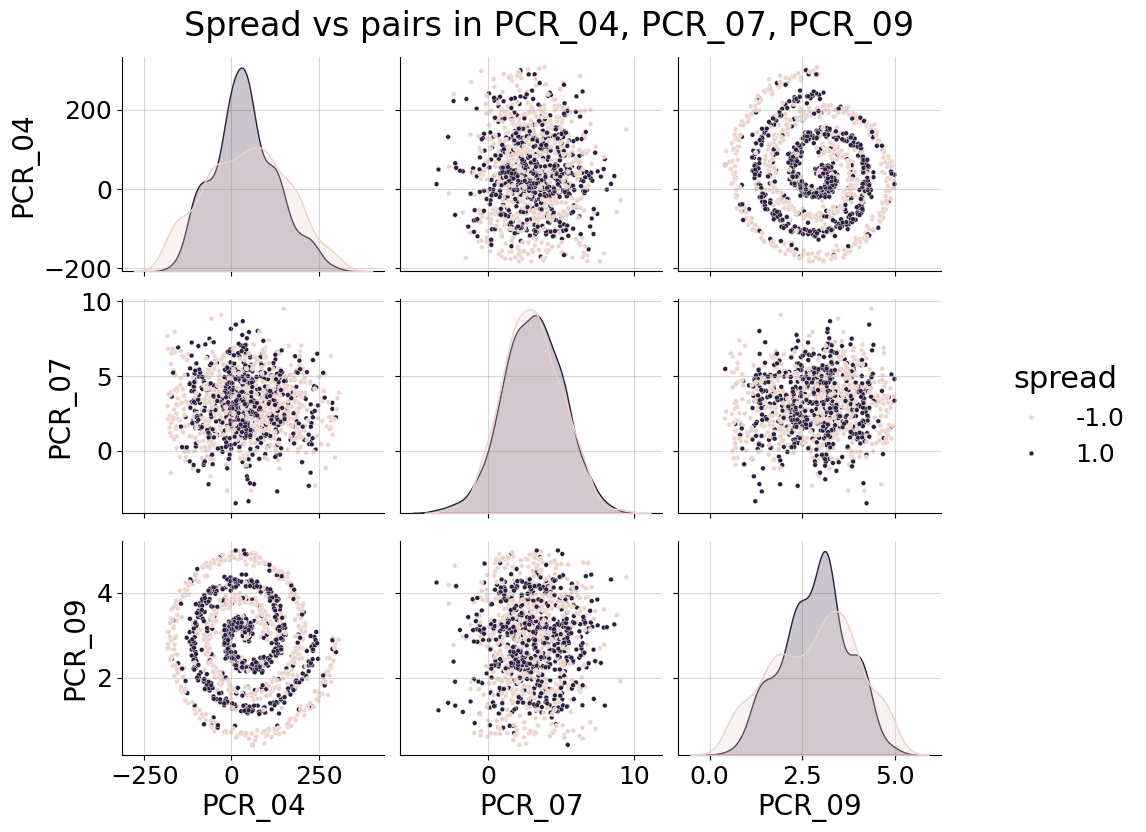

In [ ]:
#Task B: spread vs pairs in {PCR_04 , PCR_07 , PCR_09}.
g = sns.pairplot(dataset[['PCR_04', 'PCR_07', 'PCR_09', 'spread']], hue='spread', plot_kws={"s":12})
g.fig.suptitle('Spread vs pairs in PCR_04, PCR_07, PCR_09', y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12, 8)

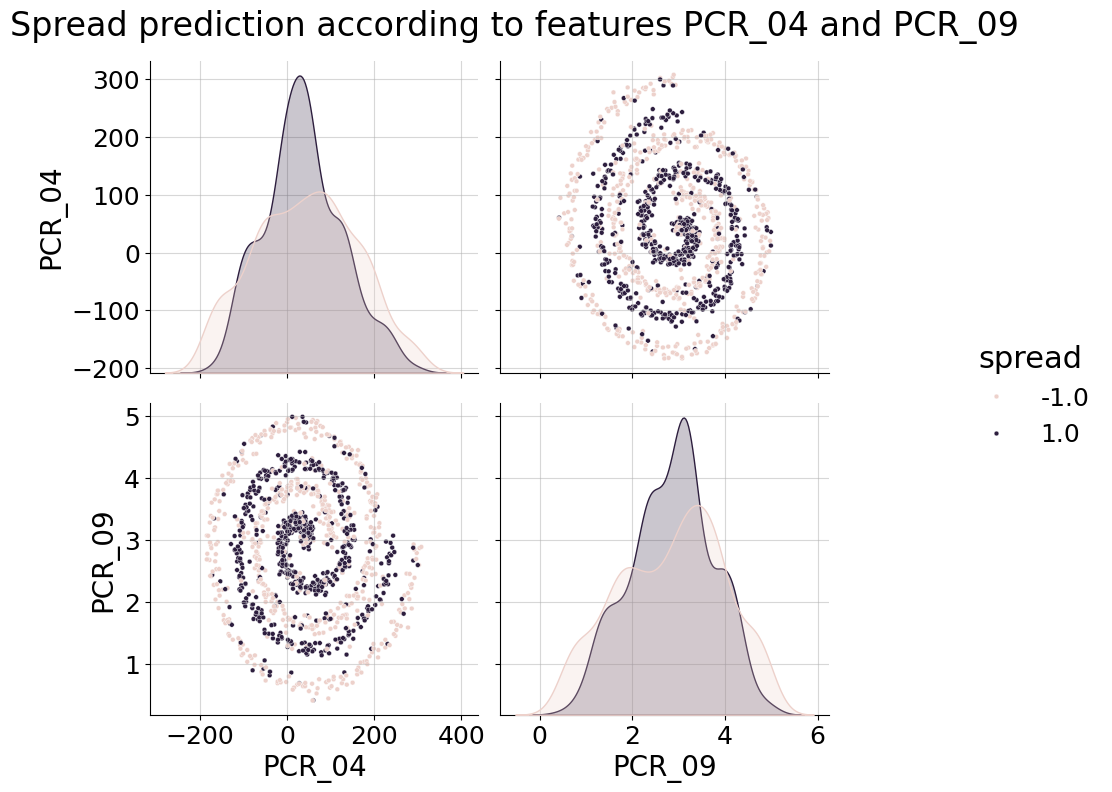

In [ ]:
#Task B: chosen pair for predction.
g = sns.pairplot(dataset[['PCR_04', 'PCR_09', 'spread']], hue='spread', plot_kws={"s":12})
g.fig.suptitle('Spread prediction according to features PCR_04 and PCR_09', y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12, 8)

In [ ]:
# Task C, implement knn
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance as dist
from collections import Counter

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        #find distances for point X from each point in test set
        distances = dist.cdist(X, self.X_train)

        #find the k nearest neibours indexes
        neighbors_ind = np.argpartition(distances,kth= self.n_neighbors, axis=-1)[:,:self.n_neighbors]

        #find the lbals of closest neighbors
        neighbor_labels = self.y_train[neighbors_ind]

        # Determine the most common label among the nearest neighbors for each test point
        def most_common_label(labels):
            return Counter(labels).most_common(1)[0][0]

        # Apply the most_common_label function to each row of neighbor_labels
        predictions = np.apply_along_axis(most_common_label, 1, neighbor_labels)

        return predictions

In [ ]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


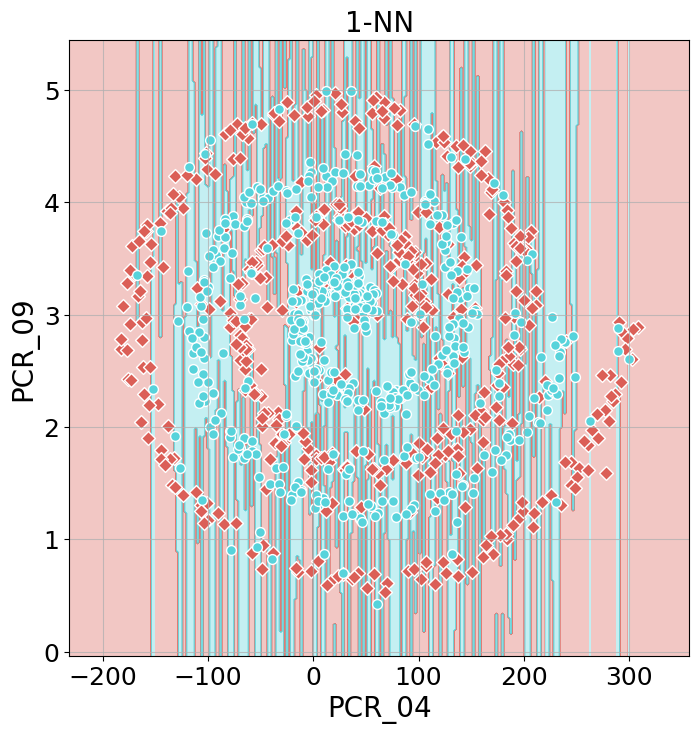

Training accuracy: 1.0000, Test accuracy: 0.6200


In [ ]:
# Task D making 1-NN model , visual using visualize_clf, sending only training data as desried.

clf = kNN(n_neighbors=1)
temp_X_train = np.copy(X_train[['PCR_04', 'PCR_09']])
temp_y_train = np.copy( y_train['spread'])
temp_X_test = np.copy(X_test[['PCR_04', 'PCR_09']])
temp_y_test = np.copy( y_test['spread'])
clf.fit(temp_X_train, temp_y_train)
prediction = clf.predict(temp_X_test)
visualize_clf(clf, temp_X_train, temp_y_train, "1-NN",
                  "PCR_04", "PCR_09",
                  marker_size=50,
                  grid_length=300,
                  linewidths=None)

# avaluating accurecy
train_score = clf.score(temp_X_train, temp_y_train)
test_score = clf.score(temp_X_test,temp_y_test)
print(f"Training accuracy: {train_score:.4f}, Test accuracy: {test_score:.4f}")

## score calls predict itself in the backend

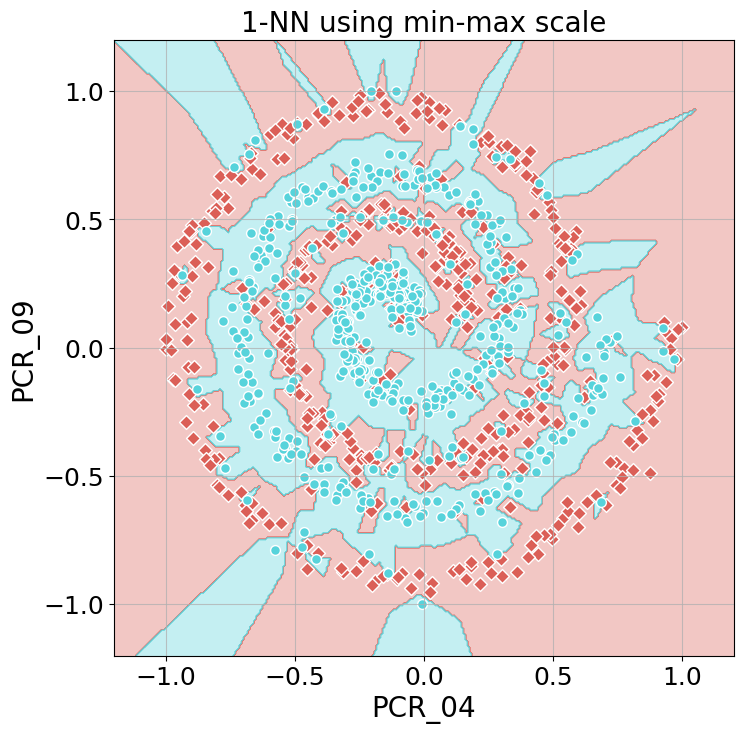

Training accuracy after scale: 1.0000, Test accuracy after scale: 0.7560


In [ ]:
# Q11 - min-max scalling to [-1,1]
from sklearn.preprocessing import MinMaxScaler
# setting scaler obj. to out range
scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))

#fitting obj. and scalling train
scaler1.fit(temp_X_train)
X_train_scaled = scaler1.transform(temp_X_train)


#fitting obj. and scalling test
scaler2.fit(temp_X_test)
X_test_scaled = scaler2.transform(temp_X_test)

# no need to scale y's since they are in the range.

# training new 1nn
new_clf = kNN(n_neighbors=1)
new_clf.fit(X_train_scaled, temp_y_train)
new_prediction = new_clf.predict(X_test_scaled)

# drawing desicion regions
visualize_clf(new_clf, X_train_scaled, temp_y_train, "1-NN using min-max scale",
                  "PCR_04", "PCR_09",
                  marker_size=50,
                  grid_length=300,
                  linewidths=None)

# evaluating accurecy
new_train_score = new_clf.score(X_train_scaled, temp_y_train)
new_test_score = new_clf.score(X_test_scaled,temp_y_test)
print(f"Training accuracy after scale: {new_train_score:.4f}, Test accuracy after scale: {new_test_score:.4f}")

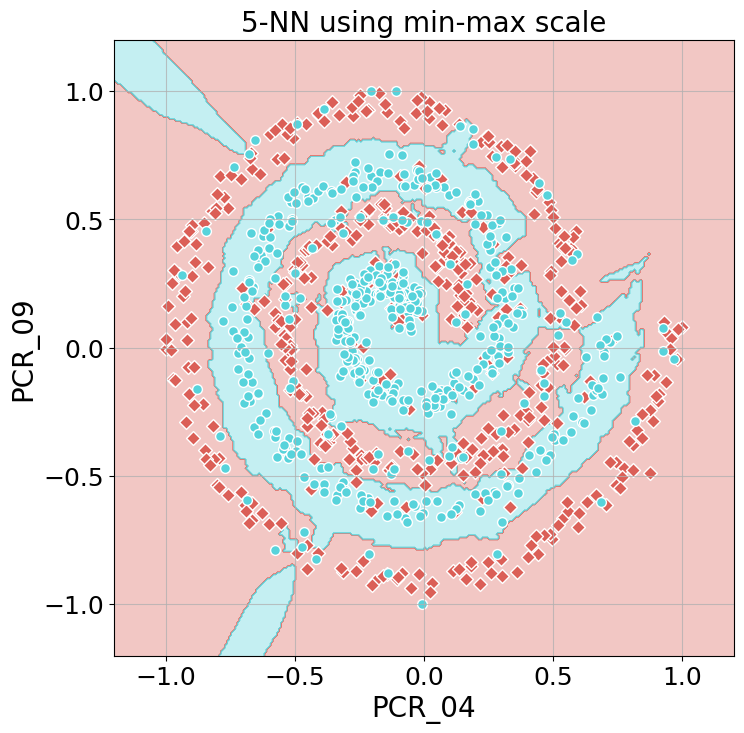

Training accuracy after scale: 0.8450, Test accuracy after scale: 0.8000


In [ ]:
# Q12 train 5-nn using normalized data
# set the 5nn model
five_clf = kNN(n_neighbors=5)
five_clf.fit(X_train_scaled, temp_y_train)
prediction = five_clf.predict(X_test_scaled)

# drawing desicion regions
visualize_clf(five_clf, X_train_scaled, temp_y_train, "5-NN using min-max scale",
                  "PCR_04", "PCR_09",
                  marker_size=50,
                  grid_length=300,
                  linewidths=None)

# evaluating accurecy
five_train_score = five_clf.score(X_train_scaled, temp_y_train)
five_test_score = five_clf.score(X_test_scaled,temp_y_test)
print(f"Training accuracy after scale: {five_train_score:.4f}, Test accuracy after scale: {five_test_score:.4f}")


In [ ]:
# Task E - creating SpecialProperty
trainGroup1 = X_train["blood_type"].isin(["O+", "B+"])
testGroup1 = X_test["blood_type"].isin(["O+", "B+"])
X_train.insert(2, "SpecialProperty", trainGroup1, True)
X_test.insert(2, "SpecialProperty", testGroup1, True)
X_train.SpecialProperty

1190    False
622     False
1104    False
557     False
447      True
        ...  
969     False
796      True
766      True
866     False
411     False
Name: SpecialProperty, Length: 1000, dtype: bool

In [ ]:
# remove the original blood_type feature from the DataFrame.
X_train = X_train.drop(columns=['blood_type'])
X_test = X_test.drop(columns=['blood_type'])

In [ ]:
#The columns of dataset
dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')

In [ ]:
# finding numerical features for Q14,15
numerical_cols = ['age', 'weight', 'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity','PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10']

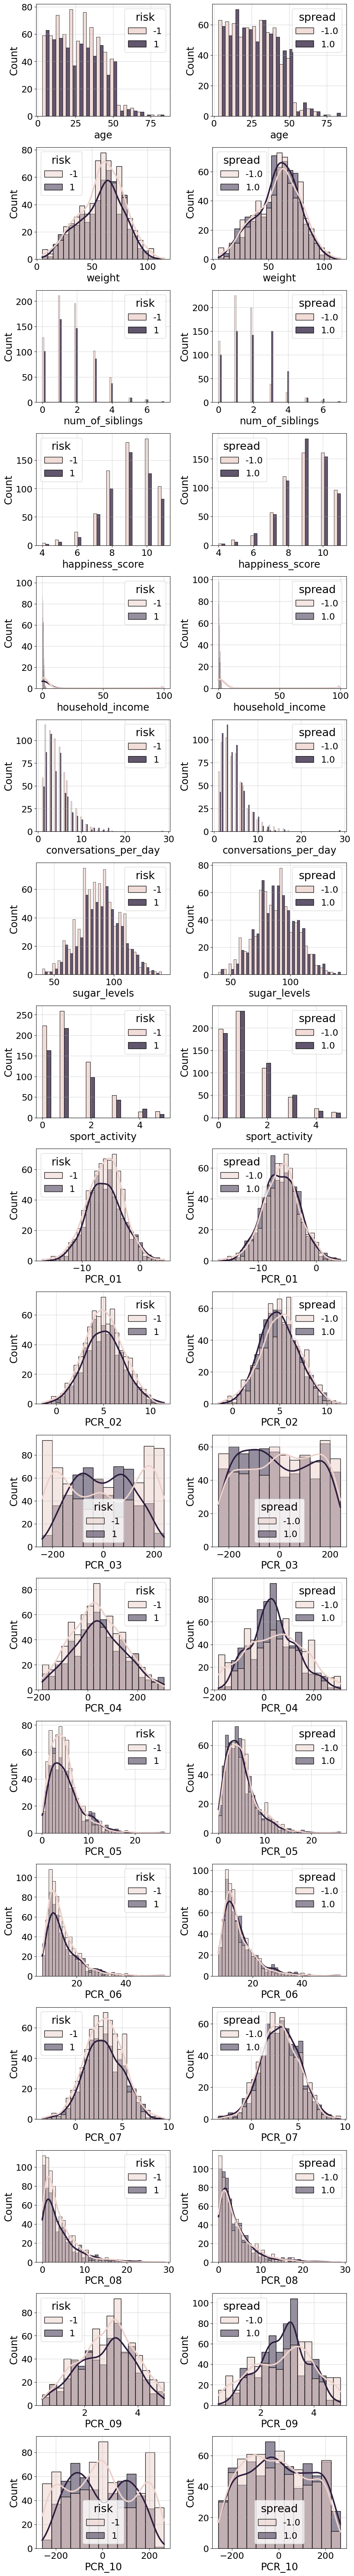

In [ ]:
#Q14,15
COL_NAME = numerical_cols
COLS, ROWS = (2, len(COL_NAME))


plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]


  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in dataset[column].dtype.name
    sns.histplot(data=dataset, x=column, hue=cls, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)


plt.tight_layout()


In [ ]:
# Q16-  spliting by SpecialProperty feature
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
split = train.groupby('SpecialProperty')
# according to SpectialProperty :
# blood groups : O+ , B+
split1 = split.get_group(True)
# blood groups : O-, A-, A+, B-, AB+, AB-
split2 = split.get_group(False)

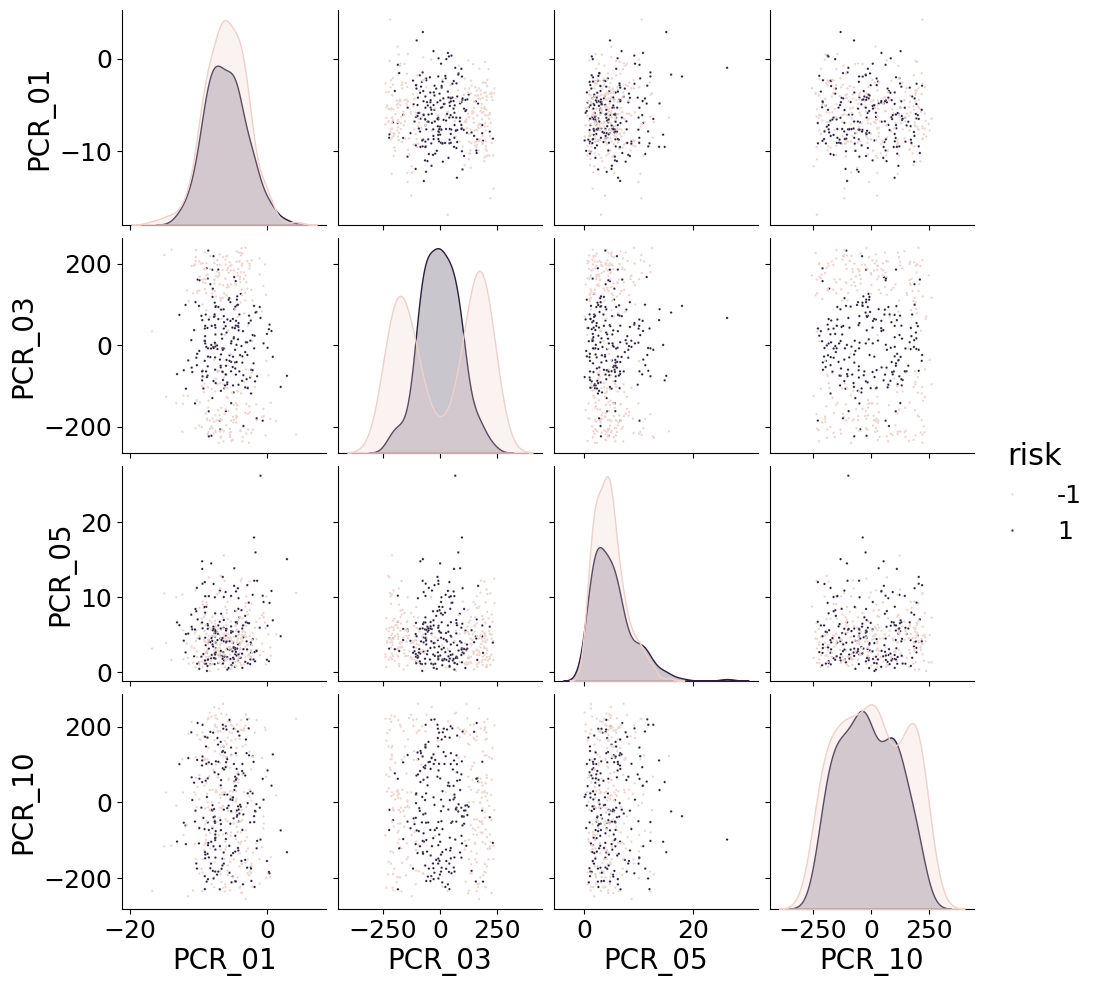

In [ ]:
# First group : O+, B+
sns.pairplot(split1[split1.filter(['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10']).columns.tolist() + ["risk"]], plot_kws={"s": 3}, hue="risk")

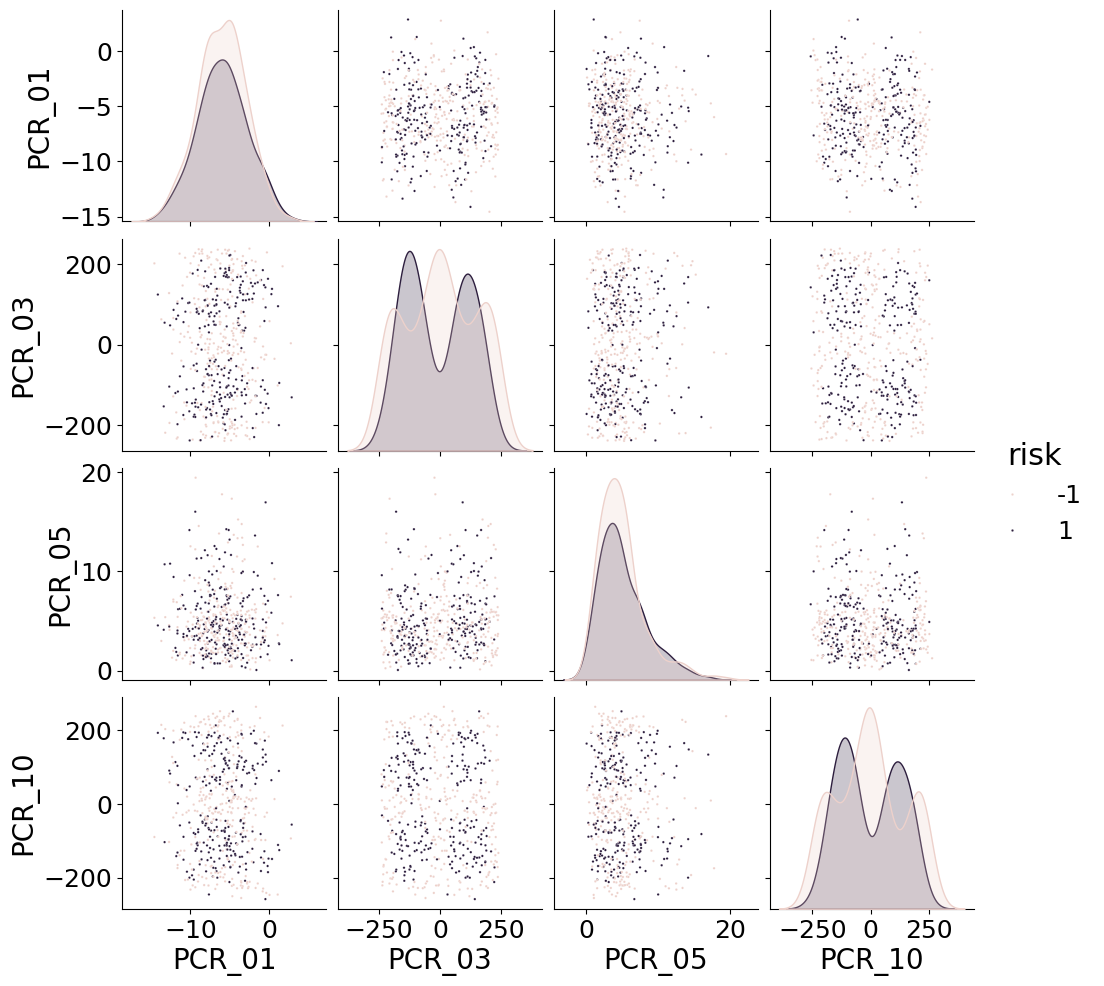

In [ ]:
# Second group : O-, A-, A+, B-, AB+, AB-
sns.pairplot(split2[split2.filter(['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10']).columns.tolist() + ["risk"]], plot_kws={"s": 3}, hue="risk")

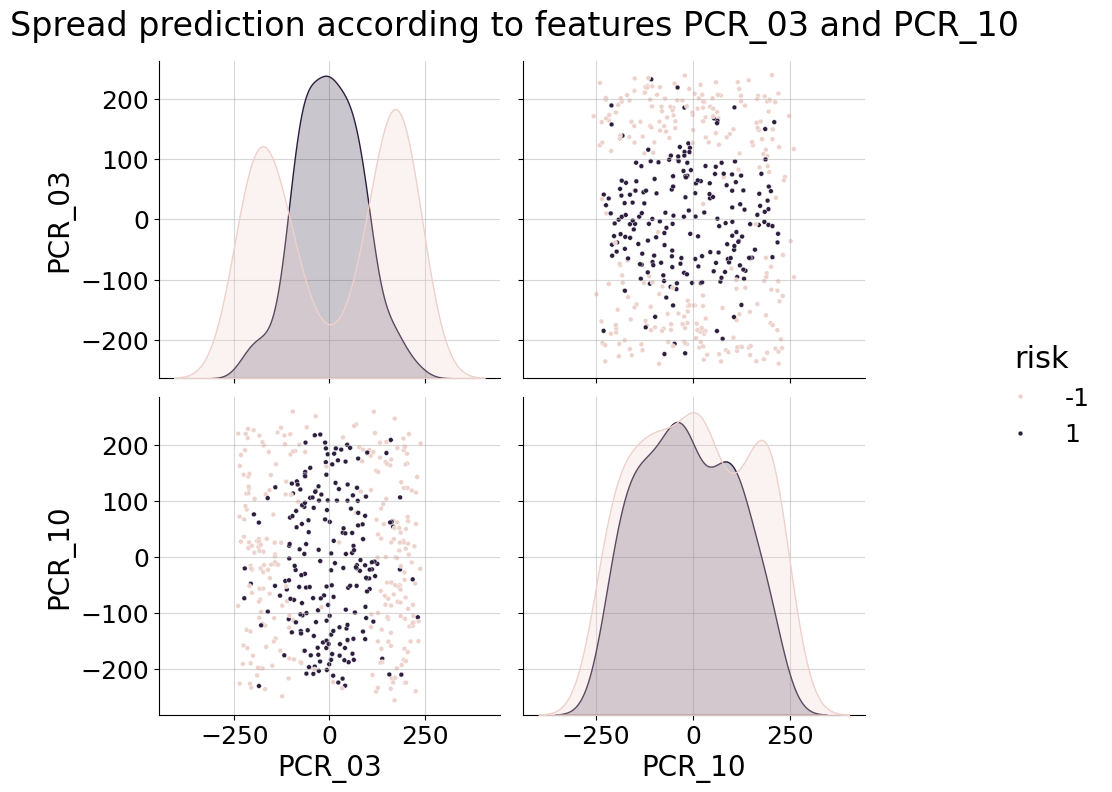

In [ ]:
g = sns.pairplot(split1[['PCR_03', 'PCR_10', 'risk']], hue='risk', plot_kws={"s":12})
g.fig.suptitle('Spread prediction according to features PCR_03 and PCR_10', y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12, 8)

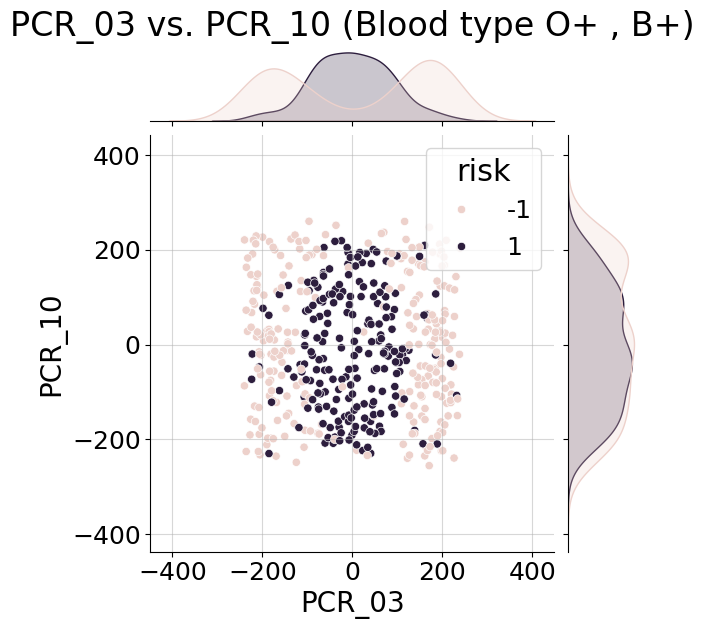

In [ ]:
g = sns.jointplot(data=split1, x="PCR_03", y="PCR_10", hue="risk")
g.fig.suptitle('PCR_03 vs. PCR_10 (Blood type O+ , B+)', y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

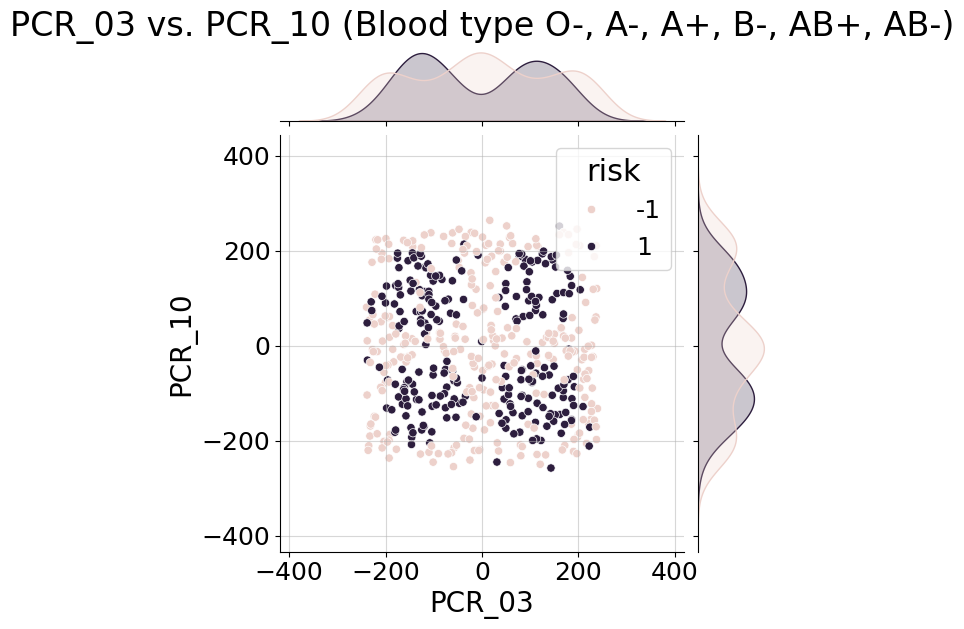

In [ ]:
g = sns.jointplot(data=split2, x="PCR_03", y="PCR_10", hue="risk")
g.fig.suptitle('PCR_03 vs. PCR_10 (Blood type O-, A-, A+, B-, AB+, AB-)', y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

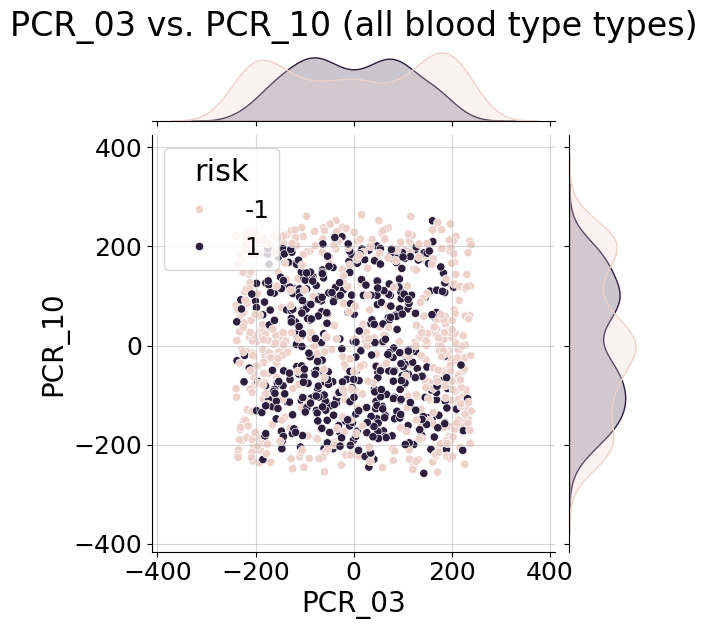

In [ ]:
g = sns.jointplot(data=train, x="PCR_03", y="PCR_10", hue="risk")
g.fig.suptitle('PCR_03 vs. PCR_10 (all blood type types)', y=1.04)
_ = g.ax_joint.grid(alpha=0.5)

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

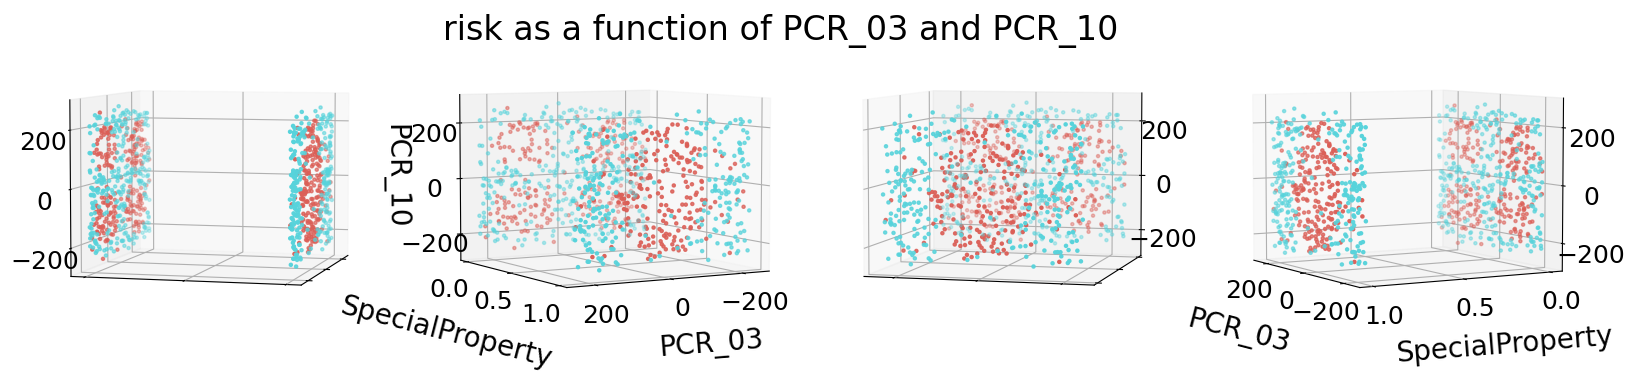

In [ ]:
# Q18
plot3d(train, "PCR_03", "SpecialProperty", "PCR_10", title="risk as a function of PCR_03 and PCR_10", hue="risk", s=5)

In [ ]:
train.shape, test.shape

((1000, 25), (250, 25))

In [ ]:
train.columns

Index(['patient_id', 'age', 'SpecialProperty', 'sex', 'weight',
       'current_location', 'num_of_siblings', 'happiness_score',
       'household_income', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04',
       'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread',
       'risk'],
      dtype='object')

In [ ]:
#counts the number of columns of train
train.columns.size

25

In [ ]:
#X_train = train.iloc[:, [0, 24]]
y_train = train["risk"]
#X_test = test.iloc[:, [0, 24]]
y_test = test["risk"]

In [ ]:
#decision tree classifier questions (19 - 21)
from sklearn.tree import DecisionTreeClassifier
h = DecisionTreeClassifier(criterion="entropy", max_depth=3)
h.fit(X_train[numerical_cols], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
trainAcc = np.sum(h.predict(X_train[numerical_cols]) == y_train) * 100 / len(y_train)
testAcc = np.sum(h.predict(X_test[numerical_cols]) == y_test) * 100 / len(y_test)
print("Train accuracy: {:.1f}%, Test accuracy: {:.1f}%".format(
trainAcc, testAcc))

Train accuracy: 66.9%, Test accuracy: 58.4%


In [ ]:
h2 = DecisionTreeClassifier(criterion="entropy", max_depth=30)
h2.fit(X_train[numerical_cols], y_train)
trainAcc = np.sum(h2.predict(X_train[numerical_cols]) == y_train) * 100 / len(y_train)
testAcc = np.sum(h2.predict(X_test[numerical_cols]) == y_test) * 100 / len(y_test)
print("Train accuracy: {:.1f}%, Test accuracy: {:.1f}%".format(
trainAcc, testAcc))

Train accuracy: 100.0%, Test accuracy: 60.8%


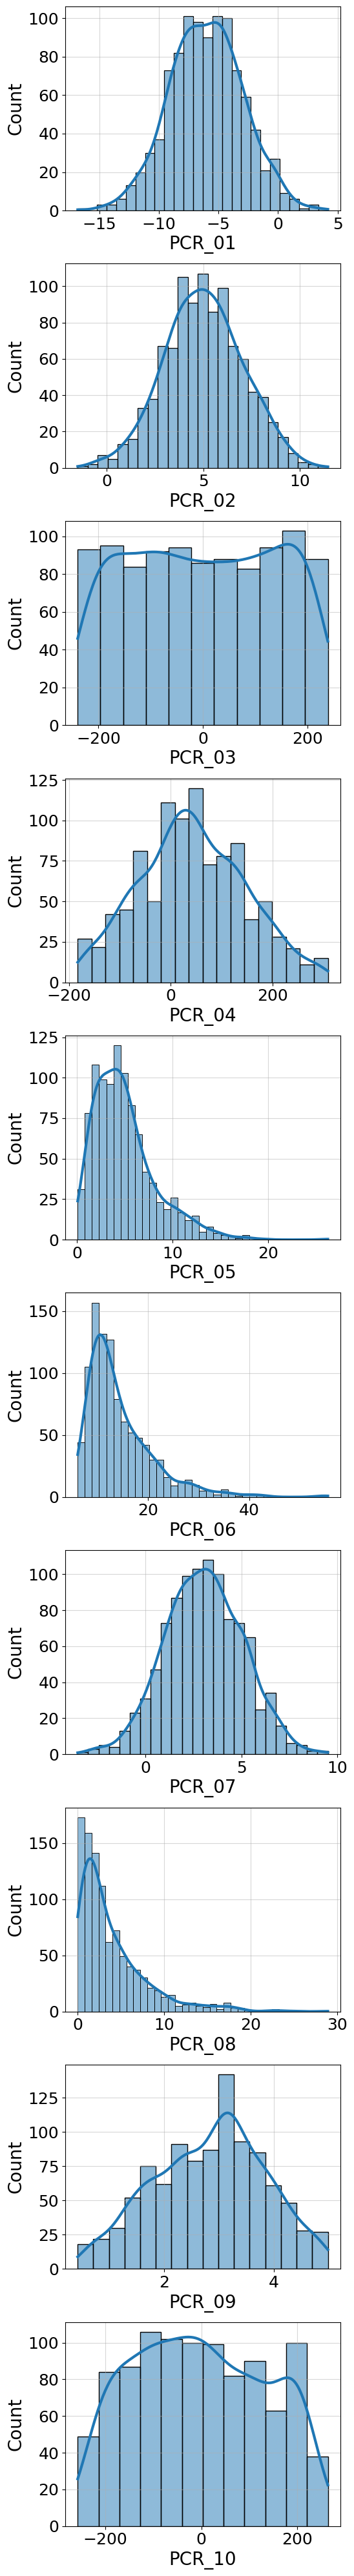

In [ ]:
# Q23
COL_NAME = ['PCR_01','PCR_02', 'PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10' ]
COLS, ROWS = (2, len(COL_NAME))


plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]

  plt.subplot(ROWS,COLS, row * COLS + 1)

  isContinuous = "float" in train[column].dtype.name
  sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)


plt.tight_layout()

In [ ]:
# Task H apply normalization to PCR features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler= StandardScaler()
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

features_standard = ['PCR_01', 'PCR_02', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08']
train[features_standard] = standard_scaler.fit_transform(train[features_standard])

# Apply MinMaxScaler to skewed and uniform distributions
features_min_max = ['PCR_03', 'PCR_04', 'PCR_09', 'PCR_10']
train[features_min_max] = min_max_scaler.fit_transform(train[features_min_max])

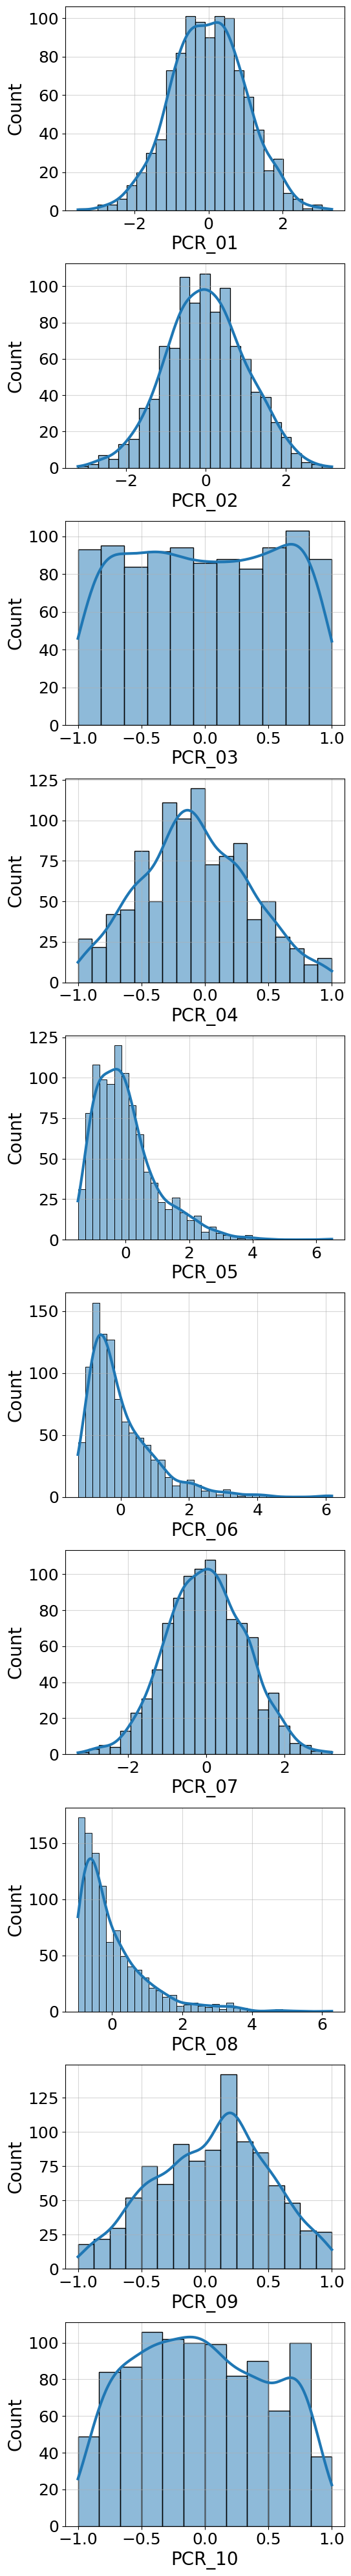

In [ ]:
# Checking effect of normalization
COL_NAME = ['PCR_01','PCR_02', 'PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10' ]
COLS, ROWS = (2, len(COL_NAME))


plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]

  plt.subplot(ROWS,COLS, row * COLS + 1)

  isContinuous = "float" in train[column].dtype.name
  sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)


plt.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(training_data, new_data):
  # make a copy of new_data
  temp_data = new_data.copy()

  # fill null entries in household incomde with the median
  temp_data.household_income = temp_data.household_income.fillna(training_data.household_income.median())

  # create SpecialProperty feature
  if 'SpecialProperty' not in temp_data.columns:
    newGroup1 = temp_data["blood_type"].isin(["O+", "B+"])
    temp_data.insert(2, "SpecialProperty", newGroup1, True)

  # remove bloot type column
  temp_data = temp_data.drop(columns=['patient_id', 'pcr_date', 'current_location', 'blood_type'])

  # scale features according to the train data
  standard_scaler= StandardScaler()
  min_max_scaler = MinMaxScaler(feature_range=(-1,1))
  features_standard = ['PCR_01', 'PCR_02', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08']
  features_min_max = ['PCR_03', 'PCR_04', 'PCR_09', 'PCR_10']

  # fit the scalers to the training data statistics
  standard_scaler.fit(training_data[features_standard])
  min_max_scaler.fit(training_data[features_min_max])

  # apply the scalers on the relevant features
  temp_data[features_standard] = standard_scaler.transform(temp_data[features_standard])
  temp_data[features_min_max] = min_max_scaler.transform(temp_data[features_min_max])

  return temp_data

In [ ]:
X_train_final, X_test_final, y_train_final, y_test_final= train_test_split(X_dataset, y, test_size=0.2, random_state=146)


In [ ]:
# Prepare training set according to itself
train_df_prepared = prepare_data(X_train_final, X_train_final)


# Prepare test set according to the raw training set
test_df_prepared = prepare_data(X_train_final, X_test_final)


In [ ]:
train_df_prepared

age  SpecialProperty sex  weight  num_of_siblings  happiness_score  \
1190   13            False   F    45.8                3               10   
622    36            False   M    81.2                2               10   
1104   12            False   F    35.6                0                6   
557    16            False   F    37.0                0               10   
447    20             True   F    48.8                0               10   
...   ...              ...  ..     ...              ...              ...   
969    15            False   M    55.6                2               10   
796    42             True   F    75.5                0                7   
766    36             True   F    79.3                1                8   
866    18            False   M    53.5                4               10   
411    48            False   F    63.4                3                9   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
1190               0.6                      3            69               1   
622                0.1                      1            78               2   
1104               0.1                      9            53               0   
557                1.3                      2            77               0   
447                0.8                     12            64               1   
...                ...                    ...           ...             ...   
969                1.2                      1            73               1   
796                1.0                      6            84               1   
766                0.1                      2            86               2   
866                0.9                      5           104               0   
411                0.5                      5            98               1   

        PCR_01    PCR_02    PCR_03    PCR_04    PCR_05    PCR_06    PCR_07  \
1190 -0.166717  0.379204 -0.305056  0.480250 -1.290008  2.032464  0.915596   
622  -1.009481 -0.276198  0.347652  0.311061  0.105731 -0.507896  0.295544   
1104 -0.191562  0.214235 -0.255006 -0.190046  0.618664 -0.868141  0.177274   
557   0.354492 -0.039896  0.399016 -0.917272  0.349935  0.433445  0.983736   
447   0.502199  0.121809 -0.654739  0.505566 -0.751899  0.531366  1.091251   
...        ...       ...       ...       ...       ...       ...       ...   
969   1.844401 -0.010767 -0.104438  0.201800 -0.190584 -0.786027 -1.103651   
796   0.329066 -0.498572 -0.411400  0.181685 -0.933479 -0.874758  0.596915   
766   0.686406 -0.734748 -0.877352 -0.109220 -0.308427 -0.451683 -1.690112   
866  -0.233818 -2.566599  0.465421 -0.044289 -1.004392 -0.708246  1.164902   
411  -1.281176 -0.593769 -0.250553 -0.109312  0.266489 -0.557201  0.143113   

        PCR_08    PCR_09    PCR_10  
1190 -0.174585 -0.154751 -0.347023  
622  -0.441407  0.308110 -0.413234  
1104 -0.936225  0.209518  0.898605  
557   0.173791  0.100350  0.787714  
447  -0.408542 -0.360811 -0.260589  
...        ...       ...       ...  
969   0.903566  0.268082 -0.935708  
796   0.064048  0.158073 -0.526082  
766  -0.827680  0.494569 -0.207576  
866   1.703550 -0.606970 -0.055002  
411  -0.314314  1.000000 -0.260279  

[1000 rows x 20 columns]

In [ ]:
from google.colab import files
outputPath = "train_df_prepared.csv"
train_df_prepared.to_csv(outputPath)
files.download(outputPath)

outputPath = "test_df_prepared.csv"
test_df_prepared.to_csv(outputPath)
files.download(outputPath)

outputPath = "y_train_final.csv"
y_train_final.to_csv(outputPath)
files.download(outputPath)

outputPath = "y_test_final.csv"
y_test_final.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>